In [9]:
import lbg_forecast.priors_gp_massfunc as gpmf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import lbg_forecast.utils as utils


cell step:  0.00125 0.00125


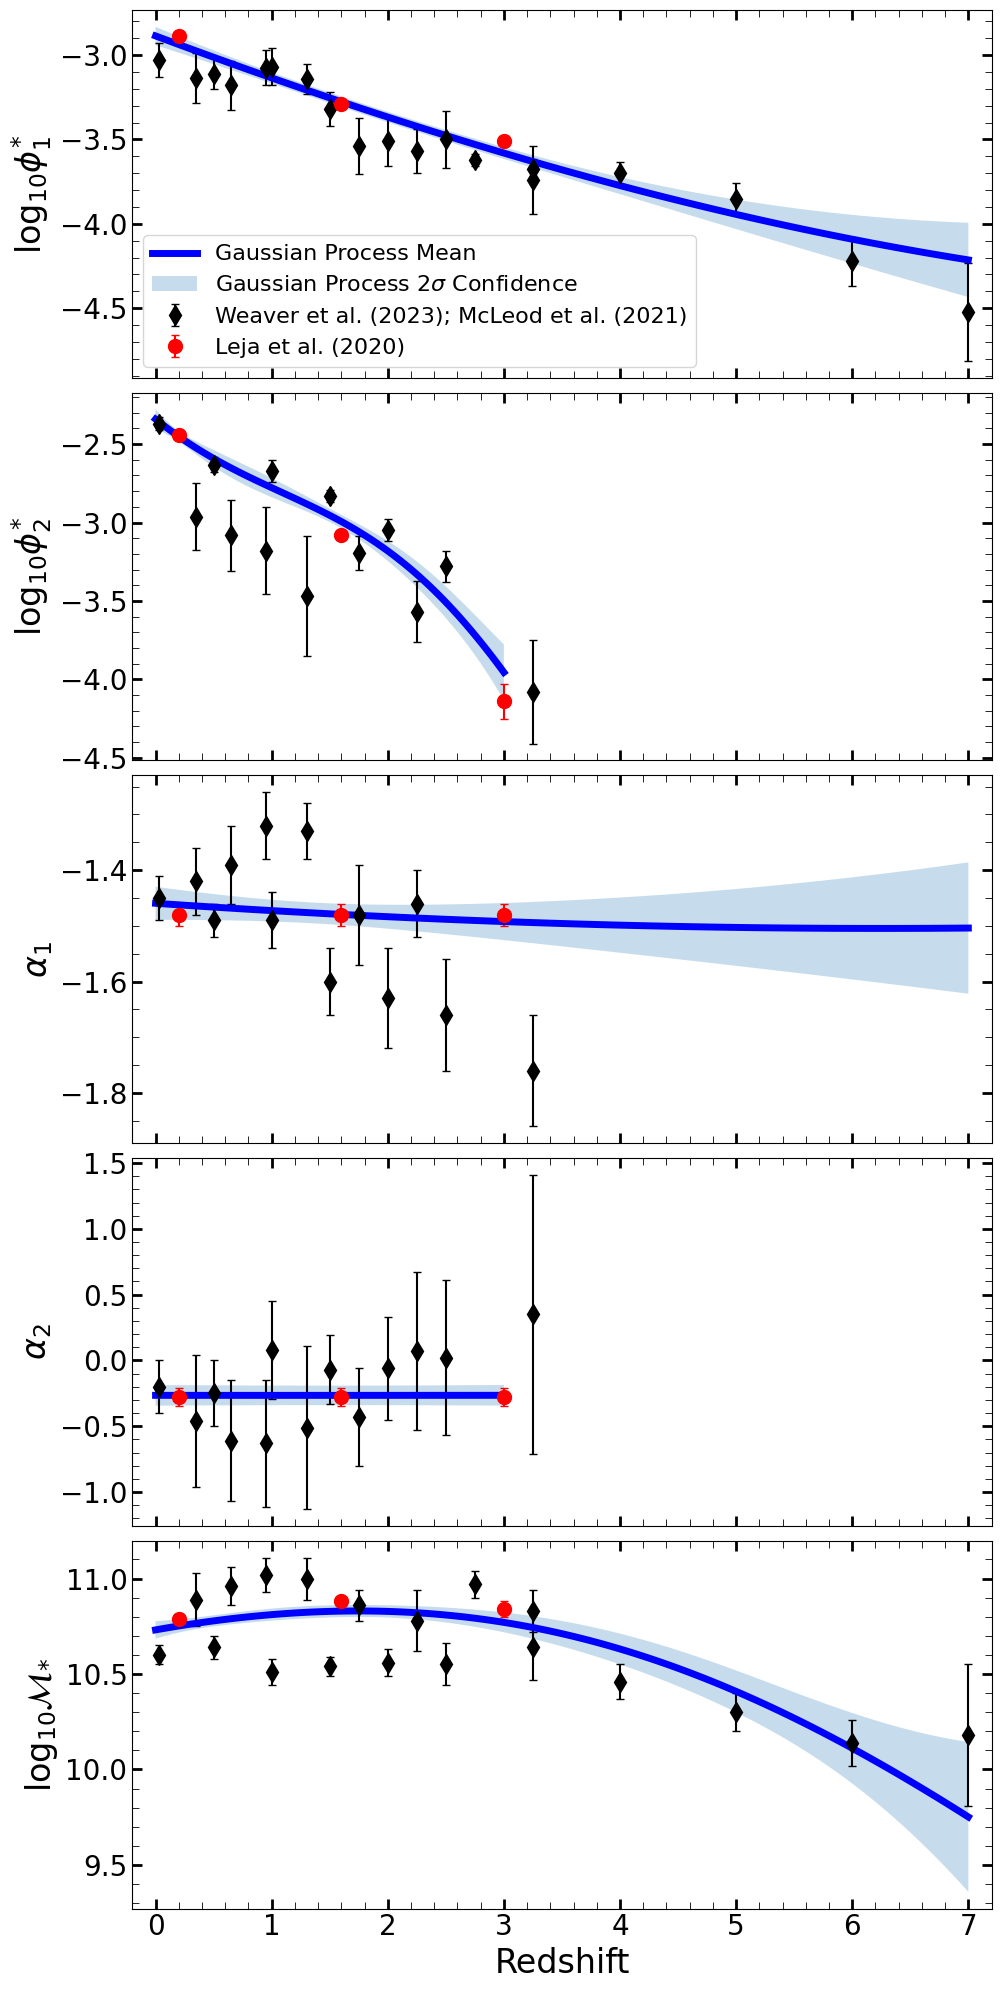

In [10]:
mass_function_prior = gpmf.MassFunctionPrior('.', mean=False)

mass_function_prior.plot_confidence()

In [3]:
gals_mean = mass_function_prior.calculate_number_density_lsst_mean()
print("Total Mean Number Density: ", gals_mean)

Total Mean Number Density:  176.69930423618453


In [12]:
n_prior_samples = 20
nsamples=500000
zbins = np.linspace(0.0, 7.0, 50)
mbins = np.linspace(7.0, 13.0, 50)

zarr=[]
marr=[]
zs=[]
logms=[]
for i in range(n_prior_samples):
    zsamples, msamples = mass_function_prior.sample_logpdf(nsamples)
    z_histogram = np.histogram(zsamples, bins=zbins, density=True)
    m_histogram = np.histogram(msamples, bins=mbins, density=True)

    zs.append(zsamples)
    logms.append(msamples)

    zarr.append(z_histogram[0])
    marr.append(m_histogram[0])



Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Galaxy PDF ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calcul

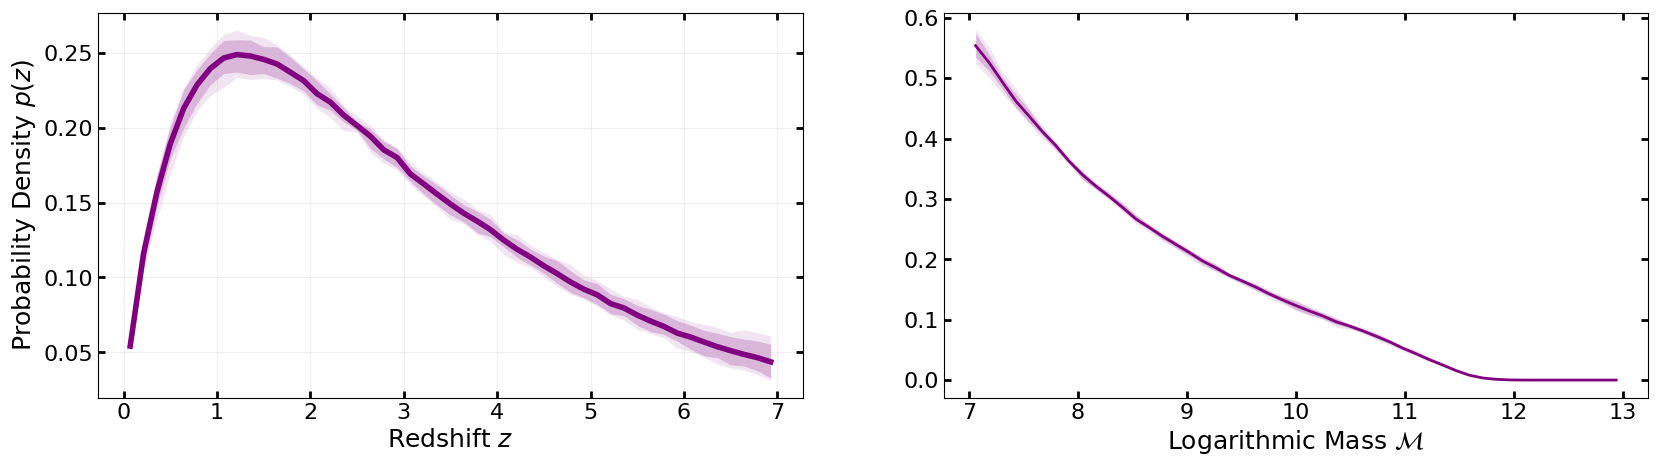

In [13]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

zs = np.vstack(np.array(zarr))
ms = np.vstack(np.array(marr))

p1=90
percentile_zs1 = np.percentile(zs, [100-p1, 50, p1], axis=0)
percentile_ms1 = np.percentile(ms, [100-p1, 50, p1], axis=0)

p2=98
percentile_zs2 = np.percentile(zs, [100-p2, 50, p2], axis=0)
percentile_ms2 = np.percentile(ms, [100-p2, 50, p2], axis=0)

alpha=0.2
colour='purple'

zs_mean = np.mean(zs, axis=0)
ax[0].plot((zbins[:-1]+zbins[1:])/2, zs_mean, lw=4, ms=3, color=colour)
ax[0].fill_between((zbins[:-1]+zbins[1:])/2, percentile_zs1[0, :],  percentile_zs1[2, :], alpha=alpha, color=colour, lw=0)
ax[0].fill_between((zbins[:-1]+zbins[1:])/2, percentile_zs2[0, :],  percentile_zs2[2, :], alpha=alpha/2, color=colour, lw=0)
ax[0].set_xlabel('Redshift $z$', fontsize=18)
ax[0].set_ylabel('Probability Density $p(z)$', fontsize=18)
ax[0].tick_params('x', labelsize=16, width=2, size=5, direction='in', top=True)
ax[0].tick_params('y', labelsize=16, width=2, size=5, direction='in', right=True)
ax[0].grid(visible=True, zorder=-1, alpha=0.2)
#for curve in zarr:
    #ax[0].plot((zbins[:-1]+zbins[1:])/2, curve, alpha=0.1, c='purple')

ms_mean = np.mean(ms, axis=0)
ax[1].plot((mbins[:-1]+mbins[1:])/2, ms_mean, lw=2, color=colour)
ax[1].fill_between((mbins[:-1]+mbins[1:])/2, percentile_ms1[0, :],  percentile_ms1[2, :], alpha=alpha, color=colour, lw=0)
ax[1].fill_between((mbins[:-1]+mbins[1:])/2, percentile_ms2[0, :],  percentile_ms2[2, :], alpha=alpha/2, color=colour, lw=0)
ax[1].set_xlabel('Logarithmic Mass $\mathcal{M}$', fontsize=18)
ax[1].tick_params('x', labelsize=16, width=2, size=5, direction='in', top=True)
ax[1].tick_params('y', labelsize=16, width=2, size=5, direction='in', right=True)
#for curve in marr:
    #ax[1].plot((mbins[:-1]+mbins[1:])/2, curve, alpha=0.1, c='purple')

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


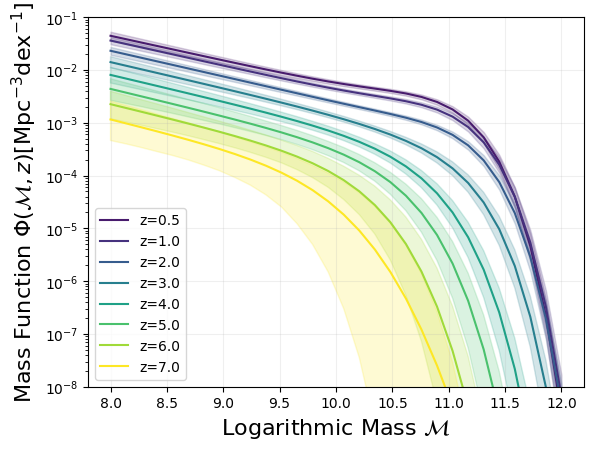

In [4]:
cmap = plt.get_cmap('viridis')
print(cmap)

redshift = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
masses = np.linspace(8, 12, 30)
nsamples = 5000
for z in redshift:
    mfunc_at_z = []
    for n in range(nsamples):
        mfunc = mass_function_prior.mass_function(z, masses, mass_function_prior.sample_prior())
        mfunc_at_z.append(mfunc)

    mfunc_at_z = np.vstack(np.array(mfunc_at_z))
    mfunc_at_z_mean = np.mean(mfunc_at_z, axis=0)
    mfunc_at_z_err = np.percentile(mfunc_at_z, [98, 50, 2], axis=0)

    #print(mfunc_at_z_mean, mfunc_at_z_err[0, :])

    plt.plot(masses, mfunc_at_z_mean, color=cmap(z/7), label="z="+str(z))
    plt.fill_between(masses, mfunc_at_z_err[0, :],  mfunc_at_z_err[2, :], color=cmap(z/7), alpha=0.2)
            
plt.ylim(1e-8, 1e-1)
plt.ylabel("Mass Function $\Phi(\mathcal{M}, z) [\mathrm{Mpc}^{-3}\mathrm{dex}^{-1}]$", fontsize=16)
plt.xlabel("Logarithmic Mass $\mathcal{M}$", fontsize=16)
#plt.tick_params('x', labelsize=18, width=2, size=5)
#plt.tick_params('y', labelsize=18, width=2, size=5)
plt.yscale('log')
plt.legend(loc="best")
plt.grid(visible=True, zorder=-1, alpha=0.2)

(0.0, 0.5)

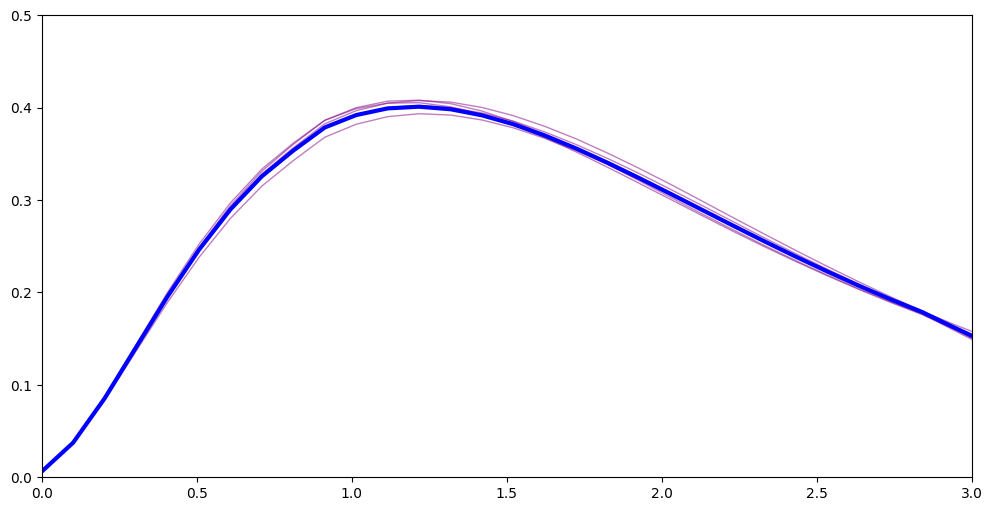

In [8]:
f, ax =plt.subplots(1, 1, figsize=(12, 6))

logm_test=10

for i in range(5):

    sparams = mass_function_prior.sample_prior()

    n_z=np.empty(0)
    for z in mass_function_prior.z_grid:
        n_z = np.append(n_z, mass_function_prior.number_of_galaxies_in_cell(z, logm_test, sparams, mass_function_prior.dlogm, mass_function_prior.dz))

    norm_nz = n_z/np.trapz(n_z, mass_function_prior.z_grid)
    ax.plot(mass_function_prior.z_grid, norm_nz, lw=1, c='purple', alpha=0.5)

n_z=np.empty(0)
for z in mass_function_prior.z_grid:
    n_z = np.append(n_z, mass_function_prior.number_of_galaxies_in_cell(z, logm_test, mass_function_prior.sample_prior_mean(), mass_function_prior.dlogm, mass_function_prior.dz))

norm_nz = n_z/np.trapz(n_z, mass_function_prior.z_grid)
ax.plot(mass_function_prior.z_grid, norm_nz, lw=3, c='blue', alpha=1.0)
ax.set_xlim(0, 3)
ax.set_ylim(0, 0.50)